In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize
from numpy import random

In [3]:
from obs import h_operator
op = "cubic"
sigma = 1.0

In [69]:
nmem = 20
nx = 40
#xf = random.normal(0, scale=sigma, size=nx*nmem).reshape(nx, nmem)
xf = random.rand(nx*nmem).reshape(nx, nmem)
xf = (xf - np.mean(xf))*sigma

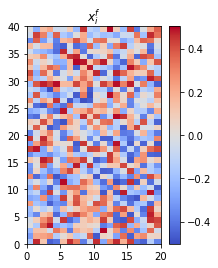

In [70]:
cmap = "coolwarm"
x = np.arange(nx+1)
y = np.arange(nmem+1)
vlim = max(np.max(xf), abs(np.min(xf)))
plt.figure(figsize=(3, 4))
mappable = plt.pcolor(y, x, xf, cmap=cmap, norm=Normalize(vmin=-vlim, vmax=vlim))
plt.colorbar(mappable)
plt.rc('text', usetex=True)
plt.title(r"$x^f_i$")
plt.rc('text', usetex=False)
plt.show()

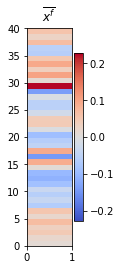

In [71]:
xf_ = np.mean(xf, axis=1)[:, None]
y_ = np.arange(1+1)
vlim = max(np.max(xf_), abs(np.min(xf_)))
plt.figure(figsize=(1, 4))
mappable = plt.pcolor(y_, x, xf_, cmap=cmap, norm=Normalize(vmin=-vlim, vmax=vlim))
plt.colorbar(mappable)
plt.rc('text', usetex=True)
plt.title(r"$\overline{x^f}$")
plt.rc('text', usetex=False)
plt.show()

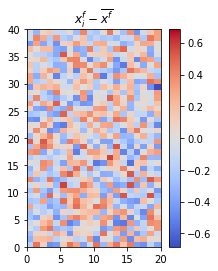

In [72]:
dxf = xf - xf_
vlim = max(np.max(dxf), abs(np.min(dxf)))
plt.figure(figsize=(3, 4))
mappable = plt.pcolor(y, x, dxf, cmap=cmap, norm=Normalize(vmin=-vlim, vmax=vlim))
plt.colorbar(mappable)
plt.rc('text', usetex=True)
plt.title(r"$x^f_i-\overline{x^f}$")
plt.rc('text', usetex=False)
plt.show()

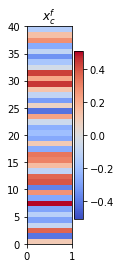

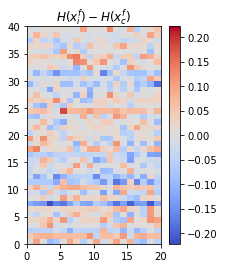

In [76]:
#xfc = random.normal(0, scale=sigma, size=nx)[:, None]
xfc = random.rand(nx)[:, None]
xfc = (xfc - np.mean(xfc))*sigma
vlim = max(np.max(xfc), abs(np.min(xfc)))
plt.figure(figsize=(1, 4))
mappable = plt.pcolor(y_, x, xfc, cmap=cmap, norm=Normalize(vmin=-vlim, vmax=vlim))
plt.colorbar(mappable)
plt.rc('text', usetex=True)
plt.title(r"$x^f_c$")
plt.rc('text', usetex=False)
plt.show()
dyc = h_operator(xf, operator=op) - h_operator(xfc, operator=op)
vlim = max(np.max(dyc), abs(np.min(dyc)))
plt.figure(figsize=(3, 4))
mappable = plt.pcolor(y, x, dyc, cmap=cmap, norm=Normalize(vmin=-vlim, vmax=vlim))
plt.colorbar(mappable)
plt.rc('text', usetex=True)
plt.title(r"$H(x^f_i)-H(x^f_c)$")
plt.rc('text', usetex=False)
plt.show()

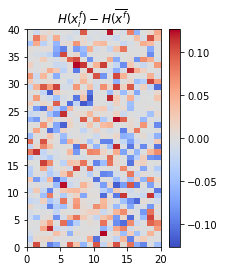

In [77]:
dy = h_operator(xf, operator=op) - h_operator(xf_, operator=op)
vlim = max(np.max(dy), abs(np.min(dy)))
plt.figure(figsize=(3, 4))
mappable = plt.pcolor(y, x, dy, cmap=cmap, norm=Normalize(vmin=-vlim, vmax=vlim))
plt.colorbar(mappable)
plt.rc('text', usetex=True)
plt.title(r"$H(x^f_i)-H(\overline{x^f})$")
plt.rc('text', usetex=False)
plt.show()

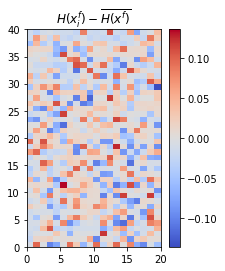

In [78]:
dyb = h_operator(xf, operator=op) - np.mean(h_operator(xf, operator=op), axis=1)[:, None]
vlim = max(np.max(dyb), abs(np.min(dyb)))
plt.figure(figsize=(3, 4))
mappable = plt.pcolor(y, x, dyb, cmap=cmap, norm=Normalize(vmin=-vlim, vmax=vlim))
plt.colorbar(mappable)
plt.rc('text', usetex=True)
plt.title(r"$H(x^f_i)-\overline{H(x^f)}$")
plt.rc('text', usetex=False)
plt.show()

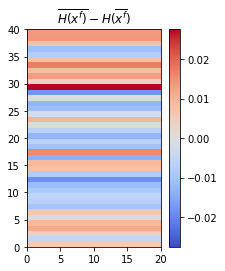

In [79]:
dif = dy - dyb
vlim = max(np.max(dif), abs(np.min(dif)))
plt.figure(figsize=(3, 4))
mappable = plt.pcolor(y, x, dif, cmap=cmap, norm=Normalize(vmin=-vlim, vmax=vlim))
plt.colorbar(mappable)
plt.rc('text', usetex=True)
plt.title(r"$\overline{H(x^f)}-H(\overline{x^f})$")
plt.rc('text', usetex=False)
plt.show()

In [88]:
import scipy.optimize as spo
from scipy.optimize import rosen, rosen_der
x0 = random.rand(10)
res = spo.minimize(rosen, x0, method='L-BFGS-B', jac=rosen_der, options={'disp':0})

In [90]:
res.keys()

dict_keys(['fun', 'jac', 'nfev', 'njev', 'nit', 'status', 'message', 'x', 'success', 'hess_inv'])

In [94]:
res.x

array([0.99999983, 0.99999986, 1.00000023, 1.00000025, 1.00000009,
       1.0000001 , 1.00000014, 0.99999984, 0.99999958, 0.99999918])

In [101]:
from mlef import calc_j as mlef_calcj
from mlef import calc_grad_j as mlef_calcg
from mlef import precondition

In [141]:
nx = 81
nmem = 4
xc = random.normal(0, scale=1.0, size=nx)
y = random.normal(1.0, scale=0.5, size=nx)
pf = random.normal(0, scale=1.0, size=nx*nmem).reshape(nx,nmem)
htype = {"operator":"cubic", "perturbation":"mlef", "gamma":1}
rmat = np.eye(nx)*1.0
rinv = rmat @ rmat.T
dh = h_operator(xc[:, None]+pf, htype["operator"], htype["gamma"]) - h_operator(xc, htype["operator"], htype["gamma"])[:, None]
zmat = rmat @ dh
tmat, heinv, condh = precondition(zmat)
gmat = pf @ tmat
x0 = random.rand(nmem)*0.0
args_j = (xc, pf, y, tmat, gmat, heinv, rinv, htype)
print(mlef_calcj(x0, *args_j))
mlef_calcg(x0, *args_j)

eigenvalues=[2729.32246714 4836.17482391 7681.63398515 8998.83274764]
cond(hessian)=3.2962526792926523
488.5898061862267


array([-157.94348989,  210.88545583, 1095.8103816 ,  910.23273651])

In [142]:
spo.check_grad(mlef_calcj, mlef_calcg, x0, *args_j)

1442.02613392608

In [134]:
from mlefb import calc_j as mlefb_calcj
from mlefb import calc_grad_j as mlefb_calcg
from mlefb import precondition as preconditionb

In [143]:
eps = 1e-6
htype = {"operator":"cubic", "perturbation":"mlefb", "gamma":1}
args_b = (xc, pf, y, preconditionb, eps, rmat, htype)
print(mlefb_calcj(x0, *args_b))
mlefb_calcg(x0, *args_b)

488.58972347487025


array([-640.0187628 , -248.67237122,  638.85797912,  249.83315503])

In [144]:
spo.check_grad(mlefb_calcj, mlefb_calcg, x0, *args_b)

165.42316061594917

## Nonlinear observation operators

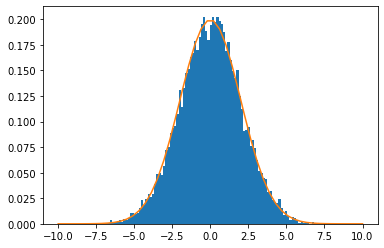

In [8]:
sigma = 2.0
r = random.normal(0.0, scale=sigma, size=10000)
x = np.linspace(-100,100)
x = x * 0.1
y = np.exp(-(x/sigma)**2/2)/np.sqrt(2*np.pi)/sigma
plt.hist(r, bins=100, density=True)
plt.plot(x, y)
plt.show()

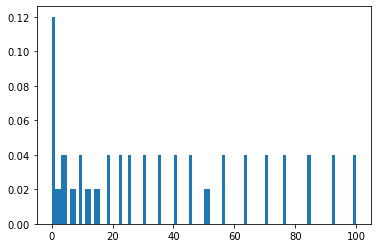

In [9]:
from obs import h_operator
op = "quadratic"
r2 = h_operator(x, op, sigma)
plt.hist(r2, bins=100, density=True)
plt.show()

(1000, 2)


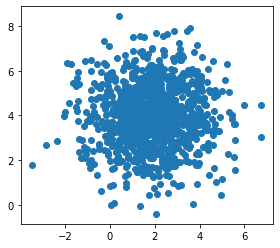

In [15]:
wmean = np.array([2.0,4.0])
wstdv = np.array([2.0,2.0])
wind = random.multivariate_normal(wmean, np.diag(wstdv), size=1000)
print(wind.shape)
fig, ax = plt.subplots()
ax.scatter(wind[:,0], wind[:,1])
ax.set_aspect("equal")
plt.show()